In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Кейс Прогнозирования.csv', sep=';')
df['month'] = pd.to_datetime(df['month'], dayfirst=True)
df['month'].min(), df['month'].max()

(Timestamp('1993-01-01 00:00:00'), Timestamp('2016-08-01 00:00:00'))

In [3]:
data = df.set_index('month')

TestStatistics         -3.009569
P-value                 0.034010
#lagsUsed              14.000000
#obs used             269.000000
critical_value 1%      -3.454896
critical_value 5%      -2.872345
critical_value 10%     -2.572528
dtype: float64

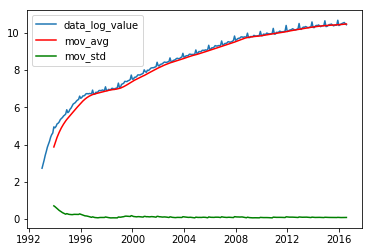

In [4]:
data_log_value= np.log(data)

mov_avg= data_log_value.rolling(window=12).mean()
mov_std= data_log_value.rolling(window=12).std()

plt.plot(data_log_value, label='data_log_value')
plt.plot(mov_avg, color='red', label='mov_avg')
plt.plot(mov_std, color='green', label='mov_std')
plt.legend()

from statsmodels.tsa.stattools import adfuller
org_test= adfuller(data_log_value['WAG_C_M'])
org_output=pd.Series(org_test[0:4], index=['TestStatistics', 'P-value', '#lagsUsed', '#obs used'])
for key, value in org_test[4].items():
    org_output['critical_value {}'.format(key)]=value
org_output

In [5]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data_log_value_shift = data_log_value - data_log_value.shift(1)
data_log_value_shift.dropna(inplace=True)

acf = acf(data_log_value_shift, nlags=10)
pacf =pacf(data_log_value_shift, nlags=10, method='ols')

Text(0.5, 1.0, 'PartialAutoCorrelation Function')

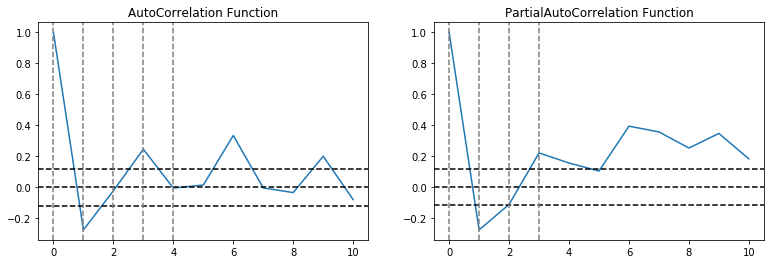

In [6]:
plt.figure(figsize=(13,4))
plt.subplot(121)
plt.plot(acf)
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=-1.96/np.sqrt(len(data_log_value_shift)), linestyle='--', color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_value_shift)), linestyle='--', color='black')
plt.axvline(x=0, linestyle='--', color='grey')
plt.axvline(x=1, linestyle='--', color='grey')
plt.axvline(x=2, linestyle='--', color='grey')
plt.axvline(x=3, linestyle='--', color='grey')
plt.axvline(x=4, linestyle='--', color='grey')
plt.title('AutoCorrelation Function')


plt.subplot(122)
plt.plot(pacf)
plt.axhline(y=0, linestyle='--', color='black')
plt.axhline(y=-1.96/np.sqrt(len(data_log_value_shift)), linestyle='--', color='black')
plt.axhline(y=1.96/np.sqrt(len(data_log_value_shift)), linestyle='--', color='black')
plt.axvline(x=0, linestyle='--', color='grey')
plt.axvline(x=1, linestyle='--', color='grey')
plt.axvline(x=2, linestyle='--', color='grey')
plt.axvline(x=3, linestyle='--', color='grey')
plt.title('PartialAutoCorrelation Function')

Text(0.5, 1.0, 'PartialAutocorrelation Function')

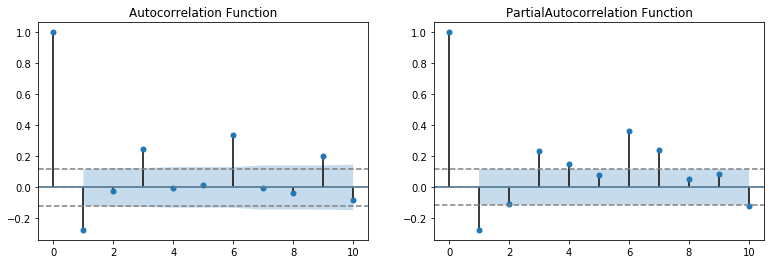

In [7]:
fig = plt.figure(figsize=(13,4))

ax = fig.add_subplot(121)
plot_acf(data_log_value_shift, lags=10, ax=ax)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_value_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_value_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

ax = fig.add_subplot(122)
plot_pacf(data_log_value_shift, lags=10, ax=ax)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_value_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_value_shift)),linestyle='--',color='gray')
plt.title('PartialAutocorrelation Function')

C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


-485.15416943947685
0.10128236481293923
RMSE value is 2.90304723045467


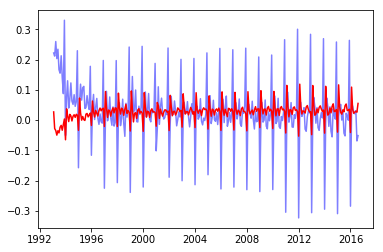

In [8]:
from statsmodels.tsa.arima_model import ARIMA

model_ARIMA1 = ARIMA(data_log_value, order=(1,1,1))
result1 = model_ARIMA1.fit()
print(result1.aic)

plt.plot(data_log_value_shift, color='blue', alpha=0.5 )
plt.plot(result1.fittedvalues, color='red')


from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(data_log_value_shift, result1.fittedvalues)))
print('RMSE value is {}'.format(sum((data_log_value_shift['WAG_C_M']-result1.fittedvalues)**2)))

In [9]:
import itertools

p = d = q = range(0,5)
pdq = list(itertools.product(p,d,q))

for i in pdq:
    try:
        model_ARIMA1 = ARIMA(data_log_value, order=i)
        result1 = model_ARIMA1.fit()
        print(i, result1.aic)
    except:
        continue

C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(0, 0, 0) 1133.9844567124148
(0, 0, 1) 788.4503851448058
(0, 0, 2) 468.97060895748893
(0, 0, 3) 309.40919488061064


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(0, 0, 4) 95.80062693918705
(0, 1, 0) -465.65209373259324
(0, 1, 1) -485.789921028585
(0, 1, 2) -488.35630416882805


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodel

(0, 1, 3) -523.2147186994825


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(0, 1, 4) -558.930866345127
(0, 2, 0) -200.8881722706684
(0, 2, 1) -470.4486306855232
(1, 0, 0) -439.9528902917882


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodel

(1, 0, 1) -447.6339001648157
(1, 0, 2) -453.1711841835854


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1, 0, 3) -478.3565286572391


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1, 0, 4) -523.9354477339464
(1, 1, 0) -485.91480601454646
(1, 1, 1) -485.15416943947685


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodel

(1, 1, 2) -588.4628585171081


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1, 1, 3) -589.3175592932191


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1, 1, 4) -590.5915472594709
(1, 2, 0) -325.5626245015666
(1, 2, 1) -514.8267632510571


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodel

(1, 2, 2) -589.406055226389


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1, 2, 3) -590.7634181147301


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(1, 2, 4) -593.4443521294312
(2, 0, 0) -449.05971092828963
(2, 0, 1) -447.0597958672704


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodel

(2, 0, 4) -550.1746314082161
(2, 1, 0) -487.42034659698515
(2, 1, 1) -513.3099275745203


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(2, 1, 2) -569.9836798355932


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(2, 1, 3) -589.8788974958586


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\s

(2, 1, 4) -574.532856836214
(2, 2, 0) -438.1745663377318
(2, 2, 1) -554.113775130712


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(2, 2, 2) -591.1115416430658


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(2, 2, 3) -590.2674811877263


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(2, 2, 4) -655.5194463993465
(3, 0, 0) -447.0600673977324


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 0, 1) -447.4655116428771


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 0, 2) -525.7502695521143


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 0, 3) -566.4765835860824
(3, 0, 4) -524.9805071192768
(3, 1, 0) -500.51651502920095


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 1, 1) -551.8631092527576


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 1, 2) -589.4955590980392


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 1, 3) -562.4336884358506


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 1, 4) -653.6917917946707
(3, 2, 0) -473.4300890956023


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 2, 1) -556.0508801534735


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 2, 2) -573.9843330398356


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 2, 3) -619.5543132008871


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(3, 2, 4) -634.2737423720158
(4, 0, 0) -474.5656014180479


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(4, 0, 1) -370.51016207592147


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(4, 0, 2) -577.1283392327819


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\sta

(4, 0, 4) -635.8201216176467
(4, 1, 0) -506.08946904462186
(4, 1, 1) -553.6330784453692


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\sta

(4, 1, 2) -571.2959219249576
(4, 1, 3) -618.0987531686405


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(4, 1, 4) -632.8295223401296
(4, 2, 0) -487.76643696153303


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(4, 2, 1) -564.2011465258446


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\s

(4, 2, 2) -571.5646305259719
(4, 2, 3) -608.3884908800966


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


(4, 2, 4) -634.2322520630122


C:\Users\stepanovaev9\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [10]:
predicted_ARIMA_diff = result1.fittedvalues
predicted_ARIMA_diff_cumsum = np.cumsum(predicted_ARIMA_diff)

predicted_log_value = pd.Series(data_log_value['WAG_C_M'].iloc[0],
                               index=data_log_value.index).add(predicted_ARIMA_diff_cumsum,fill_value=0)
predicted_log_value.head()

month
1993-01-01    2.727853
1993-02-01    2.727853
1993-03-01    2.726915
1993-04-01    2.731511
1993-05-01    2.690561
dtype: float64

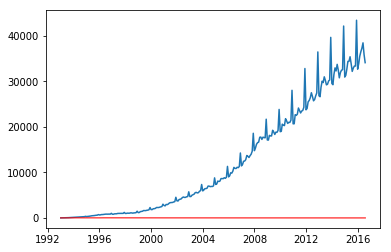

-1.0349827068894495

In [11]:
prediction_ARIMA = np.exp(predicted_log_value)
plt.plot(data)
plt.plot(prediction_ARIMA, color='red', alpha=0.7)
plt.show()

from sklearn import metrics
metrics.r2_score(data, prediction_ARIMA)

In [12]:
data.index.max()

Timestamp('2016-08-01 00:00:00')

(array([10.56114199, 10.5263868 , 10.49603558, 10.54238206, 10.50797897,
        10.48677551, 10.51464105, 10.47850383, 10.4663924 , 10.47769056,
        10.44350843, 10.43449448, 10.43321202, 10.401472  , 10.39202733,
        10.38133461, 10.35161981, 10.3396506 , 10.32201631, 10.29346646,
        10.27789534, 10.25509903, 10.22675313, 10.20715047]),
 array([0.07430593, 0.08296874, 0.08834824, 0.09690192, 0.1227338 ,
        0.13556696, 0.15933599, 0.19037437, 0.21383232, 0.24631579,
        0.28171649, 0.31308393, 0.35143771, 0.39065601, 0.42828207,
        0.47107885, 0.51398418, 0.5567587 , 0.60329239, 0.64977393,
        0.6969322 , 0.74681568, 0.7967404 , 0.84773728]),
 array([[10.41550504, 10.70677894],
        [10.36377105, 10.68900255],
        [10.3228762 , 10.66919495],
        [10.35245778, 10.73230633],
        [10.26742515, 10.74853279],
        [10.22106914, 10.75248187],
        [10.20234825, 10.82693386],
        [10.10537692, 10.85163074],
        [10.04728876, 10.885

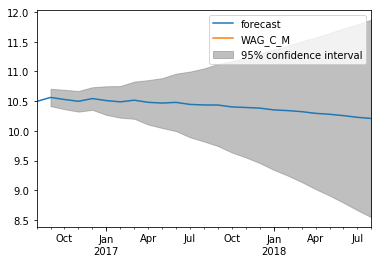

In [13]:
#lets predict for next 2 years
result1.plot_predict(start='2016-08-01', end='2018-08-01')

#forcasting the log value for next 2 years
result1.forecast(24)